<a href="https://colab.research.google.com/github/Sujal0304/Carbon_Emission_Prediction-AICTE/blob/main/Week_1_Carbon_Emission_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [2]:
orig_data_file = r"/content/climate_change_download_0.xls"
data_sheet = "Data"

# read the data from the excel file to a pandas DataFrame
data_orig = pd.read_excel(io=orig_data_file, sheet_name=data_sheet)

## **Gobal Data Overview**

In [3]:
print("Shape of the original dataset:")
data_orig.shape

Shape of the original dataset:


(13512, 28)

In [4]:
print("Available columns:")
data_orig.columns

Available columns:


Index(['Country code', 'Country name',  'Series code',  'Series name',
              'SCALE',     'Decimals',           1990,           1991,
                 1992,           1993,           1994,           1995,
                 1996,           1997,           1998,           1999,
                 2000,           2001,           2002,           2003,
                 2004,           2005,           2006,           2007,
                 2008,           2009,           2010,           2011],
      dtype='object')

In [5]:
print("Column data types:")
data_orig.dtypes


Column data types:


,0
Country code,object
Country name,object
Series code,object
Series name,object
SCALE,object
Decimals,object
1990,object
1991,object
1992,object
1993,object


In [6]:
print("Overview of the first 5 rows:")
data_orig.head()

Overview of the first 5 rows:


,Country code,Country name,Series code,Series name,SCALE,Decimals,1990,1991,1992,1993,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,ABW,Aruba,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,29.57481,..,..,..,...,..,..,..,..,..,..,..,..,..,..
1,ADO,Andorra,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0,..,..,..,...,..,..,..,..,..,..,..,..,..,..
2,AFG,Afghanistan,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0,..,..,..,...,..,..,..,..,..,..,..,..,..,..
3,AGO,Angola,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,0.208235,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,ALB,Albania,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,4.967875,..,..,..,...,..,..,..,..,..,..,..,..,..,..


In [7]:
print("Overview of the last 5 rows:")
data_orig.tail()

Overview of the last 5 rows:


,Country code,Country name,Series code,Series name,SCALE,Decimals,1990,1991,1992,1993,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
13507,YEM,"Yemen, Rep.",SP.URB.TOTL,Urban population,0,0,2497175.681,2693642.2632,2909756.3552,3139637.3184,...,5148619.3146,5410331.206,5683412.0046,5967457.827,6275723.036,6597265.194,6932788.708,7283068.4108,7648699.452,..
13508,ZAF,South Africa,SP.URB.TOTL,Urban population,0,0,18304000,18864881.576074,19446091.545173,20048481.072485,...,26345562.7512,26904362.5996,27448218.3022,27988692.117,28533559.5188,29079838.1332,29636881.5628,30193795.83,30844632.1,..
13509,ZAR,"Congo, Dem. Rep.",SP.URB.TOTL,Urban population,0,0,10120930.828,10569454.3904,11060046.8476,11568627.5584,...,16125336.2688,16867832.791,17640845.614,18431987.562,19333729.388,20261443.145,21216476.3796,22201848.3232,23219959.84,..
13510,ZMB,Zambia,SP.URB.TOTL,Urban population,0,0,3096860.882,3141668.2968,3183257.2304,3223514.6742,...,3729882.6848,3819640.7412,3912870.7312,4011827.75,4128986.897,4253139.4752,4384858.5704,4524564.0776,4614728.013,..
13511,ZWE,Zimbabwe,SP.URB.TOTL,Urban population,0,0,3036068.58,3175022.711,3310511.552,3443081.8224,...,4367338.8024,4422102.3736,4469726.7596,4512876.274,4558288.489,4600586.907,4649406.1562,4717663.7744,4814866.882,..


In [8]:
print("Descriptive statistics of the columns:")
data_orig.describe()

Descriptive statistics of the columns:


,Country code,Country name,Series code,Series name,SCALE,Decimals,1990,1991,1992,1993,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
count,13512,13512,13512,13512,13512,13512,10017,10017,10017,10017,...,10017,10017,10017,10017,10017,10017,10017,10017,10017,12382
unique,233,233,58,58,2,3,4355,3398,3523,3583,...,3877,3869,4007,4484,4008,4047,4080,3506,2164,1434
top,ABW,Aruba,AG.LND.EL5M.ZS,Land area below 5m (% of land area),0,1,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
freq,58,58,233,233,10017,5823,5163,6520,6364,6300,...,5960,5974,5792,4933,5781,5769,5414,6256,7685,10244


In [9]:
data_orig['Series name'].unique()

array(['Land area below 5m (% of land area)',
       'Agricultural land under irrigation (% of total ag. land)',
       'Cereal yield (kg per hectare)',
       'Foreign direct investment, net inflows (% of GDP)',
       'Access to electricity (% of total population)',
       'Energy use per units of GDP (kg oil eq./$1,000 of 2005 PPP $)',
       'Energy use per capita (kilograms of oil equivalent)',
       'CO2 emissions, total (KtCO2)',
       'CO2 emissions per capita (metric tons)',
       'CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)',
       'Other GHG emissions, total (KtCO2e)',
       'Methane (CH4) emissions, total (KtCO2e)',
       'Nitrous oxide (N2O) emissions, total (KtCO2e)',
       'Annex-I emissions reduction target',
       'Disaster risk reduction progress score (1-5 scale; 5=best)',
       'GHG net emissions/removals by LUCF (MtCO2e)',
       'Hosted Clean Development Mechanism (CDM) projects',
       'Hosted Joint Implementation (JI) projects',
       'Av

In [10]:
data_orig['Series code'].unique()

array(['AG.LND.EL5M.ZS', 'AG.LND.IRIG.AG.ZS', 'AG.YLD.CREL.KG',
       'BX.KLT.DINV.WD.GD.ZS', 'EG.ELC.ACCS.ZS', 'EG.USE.COMM.GD.PP.KD',
       'EG.USE.PCAP.KG.OE', 'EN.ATM.CO2E.KT', 'EN.ATM.CO2E.PC',
       'EN.ATM.CO2E.PP.GD.KD', 'EN.ATM.GHGO.KT.CE', 'EN.ATM.METH.KT.CE',
       'EN.ATM.NOXE.KT.CE', 'EN.CLC.AERT', 'EN.CLC.DRSK.XQ',
       'EN.CLC.GHGR.MT.CE', 'EN.CLC.HCDM', 'EN.CLC.HJIP',
       'EN.CLC.HPPT.MM', 'EN.CLC.ICER', 'EN.CLC.IERU', 'EN.CLC.MDAT.ZS',
       'EN.CLC.MMDT.C', 'EN.CLC.NAMA', 'EN.CLC.NAPA', 'EN.CLC.NCOM',
       'EN.CLC.PCAT.C', 'EN.CLC.PCCC', 'EN.CLC.PCHW', 'EN.CLC.PCPT.MM',
       'EN.CLC.RNET', 'EN.POP.EL5M.ZS', 'EN.URB.MCTY.TL.ZS',
       'ER.H2O.FWTL.ZS', 'ER.LND.PTLD.ZS', 'IC.BUS.EASE.XQ',
       'IE.PPI.ENGY.CD', 'IE.PPI.TELE.CD', 'IE.PPI.TRAN.CD',
       'IE.PPI.WATR.CD', 'IQ.CPA.PUBS.XQ', 'IS.ROD.PAVE.ZS',
       'NY.GDP.MKTP.CD', 'NY.GNP.PCAP.CD', 'SE.ENR.PRSC.FM.ZS',
       'SE.PRM.CMPT.ZS', 'SH.DYN.MORT', 'SH.H2O.SAFE.ZS',
       'SH.MED.NUMW.P3', 'S

In [11]:
data_orig['SCALE'].unique()

array([0, 'Text'], dtype=object)

In [12]:
data_orig['Decimals'].unique()

array([1, 0, 'Text'], dtype=object)

to see the label "Text" in the features Scale and Decimals

In [13]:
data_orig[data_orig['SCALE']=='Text']

,Country code,Country name,Series code,Series name,SCALE,Decimals,1990,1991,1992,1993,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
3029,ABW,Aruba,EN.CLC.AERT,Annex-I emissions reduction target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3030,ADO,Andorra,EN.CLC.AERT,Annex-I emissions reduction target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3031,AFG,Afghanistan,EN.CLC.AERT,Annex-I emissions reduction target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3032,AGO,Angola,EN.CLC.AERT,Annex-I emissions reduction target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3033,ALB,Albania,EN.CLC.AERT,Annex-I emissions reduction target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7218,YEM,"Yemen, Rep.",EN.CLC.RNET,Renewable energy target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,..
7219,ZAF,South Africa,EN.CLC.RNET,Renewable energy target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
7220,ZAR,"Congo, Dem. Rep.",EN.CLC.RNET,Renewable energy target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,..
7221,ZMB,Zambia,EN.CLC.RNET,Renewable energy target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,..


In [14]:
data_orig[data_orig['Decimals']=='Text']

,Country code,Country name,Series code,Series name,SCALE,Decimals,1990,1991,1992,1993,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
3029,ABW,Aruba,EN.CLC.AERT,Annex-I emissions reduction target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3030,ADO,Andorra,EN.CLC.AERT,Annex-I emissions reduction target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3031,AFG,Afghanistan,EN.CLC.AERT,Annex-I emissions reduction target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3032,AGO,Angola,EN.CLC.AERT,Annex-I emissions reduction target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3033,ALB,Albania,EN.CLC.AERT,Annex-I emissions reduction target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7218,YEM,"Yemen, Rep.",EN.CLC.RNET,Renewable energy target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,..
7219,ZAF,South Africa,EN.CLC.RNET,Renewable energy target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
7220,ZAR,"Congo, Dem. Rep.",EN.CLC.RNET,Renewable energy target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,..
7221,ZMB,Zambia,EN.CLC.RNET,Renewable energy target,Text,Text,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,..


**Key Overview on Global Data Finding**


1. shape: 28 columns, 13512 rows
all columns are of type "object" - neither numeric, nor string/text values
2. A certain amount of missing values, denoted both as NaN (not a number values) and as the string ".."
3. The rows marked as 'Text' in the columns 'SCALE' and 'Decimals' do not contain any information, almost completely composed of NaN values
4. The columns represent key values such as country, but also the corresponding years and the series code/name
6. The columns 'Country name', 'Series code', 'SCALE' and 'Decimals' do not give any information and are therefore obsolete
7. The column 'Series name' contains the country-specific features required for the analysis
8. The names of the features in the column 'Series name' are clear but too long
















In [15]:
# assign the data to a new DataFrame, which will be modified
data_clean = data_orig

print("Original number of rows:")
print(data_clean.shape[0])

# remove rows characterized as "Text" in the SCALE column
data_clean = data_clean[data_clean['SCALE']!='Text']

print("Current number of rows:")
print(data_clean.shape[0])

Original number of rows:
13512
Current number of rows:
10017


**Removing the unnecessary columns "Country name", "Series code", "SCALE", "Decimals"**

In [16]:
print("Original number of columns:")
print(data_clean.shape[1])

data_clean = data_clean.drop(['Country name', 'Series code', 'SCALE', 'Decimals'], axis='columns')

print("Current number of columns:")
print(data_clean.shape[1])

Original number of columns:
28
Current number of columns:
24


**Transform the ".." strings and emplty cells ("") into NaN values for easier recognission as missing values**

In [17]:
data_clean.iloc[:,2:] = data_clean.iloc[:,2:].replace({'':np.nan, '..':np.nan})

/tmp/ipython-input-17-1081394343.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_clean.iloc[:,2:] = data_clean.iloc[:,2:].replace({'':np.nan, '..':np.nan})


**Transform all data columns into a numerical data type**

In [18]:
data_clean2 = data_clean.applymap(lambda x: pd.to_numeric(x, errors='ignore'))
# Errors are ignored in order to avoid error messages about the first two columns, which don't need to be transformed
# into numeric type anyway

print("Print the column data types after transformation:")
data_clean2.dtypes

/tmp/ipython-input-18-2747640120.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_clean2 = data_clean.applymap(lambda x: pd.to_numeric(x, errors='ignore'))
/tmp/ipython-input-18-2747640120.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data_clean2 = data_clean.applymap(lambda x: pd.to_numeric(x, errors='ignore'))


Print the column data types after transformation:


,0
Country code,object
Series name,object
1990,float64
1991,float64
1992,float64
1993,float64
1994,float64
1995,float64
1996,float64
1997,float64


**Rename the features in column "Series name"**

  The variable/feature names in the column 'Series name' are clear, but too long and not practical to use in the code. In order to improve that, the most relevant feature names will be renamed with shorter labels as indicated in the following table:

In [19]:
# define shorter names corresponding to most relevant variables in a dictionary
chosen_vars = {'Cereal yield (kg per hectare)': 'cereal_yield',
               'Foreign direct investment, net inflows (% of GDP)': 'fdi_perc_gdp',
               'Access to electricity (% of total population)': 'elec_access_perc',
               'Energy use per units of GDP (kg oil eq./$1,000 of 2005 PPP $)': 'en_per_gdp',
               'Energy use per capita (kilograms of oil equivalent)': 'en_per_cap',
               'CO2 emissions, total (KtCO2)': 'co2_ttl',
               'CO2 emissions per capita (metric tons)': 'co2_per_cap',
               'CO2 emissions per units of GDP (kg/$1,000 of 2005 PPP $)': 'co2_per_gdp',
               'Other GHG emissions, total (KtCO2e)': 'other_ghg_ttl',
               'Methane (CH4) emissions, total (KtCO2e)': 'ch4_ttl',
               'Nitrous oxide (N2O) emissions, total (KtCO2e)': 'n2o_ttl',
               'Droughts, floods, extreme temps (% pop. avg. 1990-2009)': 'nat_emerg',
               'Population in urban agglomerations >1million (%)': 'pop_urb_aggl_perc',
               'Nationally terrestrial protected areas (% of total land area)': 'prot_area_perc',
               'GDP ($)': 'gdp',
               'GNI per capita (Atlas $)': 'gni_per_cap',
               'Under-five mortality rate (per 1,000)': 'under_5_mort_rate',
               'Population growth (annual %)': 'pop_growth_perc',
               'Population': 'pop',
               'Urban population growth (annual %)': 'urb_pop_growth_perc',
               'Urban population': 'urb_pop'
                }

# rename all variables in the column "Series name" with comprehensible shorter versions
data_clean2['Series name'] = data_clean2['Series name'].replace(to_replace=chosen_vars)

**Data frame transformation**

  This is how the current data frame looks like:

In [20]:
data_clean2.head()

,Country code,Series name,1990,1991,1992,1993,1994,1995,1996,1997,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,ABW,Land area below 5m (% of land area),29.574810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADO,Land area below 5m (% of land area),0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Land area below 5m (% of land area),0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGO,Land area below 5m (% of land area),0.208235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALB,Land area below 5m (% of land area),4.967875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To prepare the data for analysis, the values in the 'Series name' column are pivoted into separate feature columns, while years are combined into a single column. This involves melting the dataset to align values with their corresponding country and year, and then merging them into a unified, structured DataFrame.

In [21]:
# save the short feature names into a list of strings
chosen_cols = list(chosen_vars.values())

# define an empty list, where sub-dataframes for each feature will be saved
frame_list = []

# iterate over all chosen features
for variable in chosen_cols:

    # pick only rows corresponding to the current feature
    frame = data_clean2[data_clean2['Series name'] == variable]

    # melt all the values for all years into one column and rename the columns correspondingly
    frame = frame.melt(id_vars=['Country code', 'Series name']).rename(columns={'Country code': 'country', 'variable': 'year', 'value': variable}).drop(['Series name'], axis='columns')

    # add the melted dataframe for the current feature into the list
    frame_list.append(frame)


# merge all sub-frames into a single dataframe, making an outer binding on the key columns 'country','year'
from functools import reduce
all_vars = reduce(lambda left, right: pd.merge(left, right, on=['country','year'], how='outer'), frame_list)

After this transformation, the new data frame has the following layout:

In [22]:
all_vars.head()

,country,year,cereal_yield,fdi_perc_gdp,elec_access_perc,en_per_gdp,en_per_cap,co2_ttl,co2_per_cap,co2_per_gdp,...,nat_emerg,pop_urb_aggl_perc,prot_area_perc,gdp,gni_per_cap,under_5_mort_rate,pop_growth_perc,pop,urb_pop_growth_perc,urb_pop
0,ABW,1990,NaN,NaN,NaN,NaN,NaN,1840.834,29.620641,NaN,...,NaN,NaN,0.105547,NaN,NaN,NaN,1.820254,62147.0,1.780501,31259.941
1,ABW,1991,NaN,21.185138,NaN,NaN,NaN,1928.842,29.838835,NaN,...,NaN,NaN,0.104930,8.720670e+08,NaN,NaN,3.936181,64642.0,3.337974,32321.000
2,ABW,1992,NaN,-3.857809,NaN,NaN,NaN,1723.490,25.239288,NaN,...,NaN,NaN,0.104930,9.586592e+08,NaN,NaN,5.484041,68286.0,4.882234,33938.142
3,ABW,1993,NaN,-1.655492,NaN,NaN,NaN,1771.161,24.405233,NaN,...,NaN,NaN,0.104930,1.083240e+09,14940.0,NaN,6.088818,72573.0,5.483368,35851.062
4,ABW,1994,NaN,-5.874439,NaN,NaN,NaN,1763.827,22.977867,NaN,...,NaN,NaN,0.104930,1.245810e+09,15320.0,NaN,5.611677,76762.0,5.002538,37690.142


**Remove the remaining missing values in an optimal way**

 Although some columns and rows with empty cells have already been deleted, there are still remaining missing values:

In [23]:
print("check the amount of missing values in each column")
all_vars.isnull().sum()

check the amount of missing values in each column


,0
country,0
year,0
cereal_yield,1377
fdi_perc_gdp,1111
elec_access_perc,5027
en_per_gdp,2082
en_per_cap,1956
co2_ttl,1143
co2_per_cap,1146
co2_per_gdp,1557


**Handling Missing Values**

 The goal is to minimize missing data while retaining as much useful information as possible. Instead of dropping all rows with NaNs, the approach filters by year, country, and feature—removing rows or columns starting with those that have the most missing values.

Since countries and years appear multiple times, NaN counts are aggregated per unique country and year to guide selective cleaning.



**Filtering the years by missing values**

 Checking the amount of missing values for each year:

In [24]:
all_vars_clean = all_vars

#define an array with the unique year values
years_count_missing = dict.fromkeys(all_vars_clean['year'].unique(), 0)
for ind, row in all_vars_clean.iterrows():
    years_count_missing[row['year']] += row.isnull().sum()

# sort the years by missing values
years_missing_sorted = dict(sorted(years_count_missing.items(), key=lambda item: item[1]))

# print the missing values for each year
print("missing values by year:")
for key, val in years_missing_sorted.items():
    print(key, ":", val)


missing values by year:
2005 : 1189
2000 : 1273
1995 : 1317
1990 : 1427
2007 : 1631
2006 : 1633
2004 : 1646
2008 : 1708
2003 : 1714
2002 : 1715
2001 : 1718
1999 : 1729
1998 : 1739
1997 : 1746
1996 : 1756
1994 : 1781
1993 : 1792
1992 : 1810
1991 : 1921
2009 : 2078
2010 : 3038
2011 : 4893


**Filtering by Year**

The goal is to remove countries with excessive missing data while preserving the time span as much as possible. To achieve this, a threshold for allowed NaN values per year is applied.

Based on earlier analysis, the years 1991 to 2008 offer a good balance and are selected for further processing

In [25]:
print("number of missing values in the whole dataset before filtering the years:")
print(all_vars_clean.isnull().sum().sum())
print("number of rows before filtering the years:")
print(all_vars_clean.shape[0])

# filter only rows for years between 1991 and 2008 (having less missing values)
all_vars_clean = all_vars_clean[(all_vars_clean['year'] >= 1991) & (all_vars_clean['year'] <= 2008)]

print("number of missing values in the whole dataset after filtering the years:")
print(all_vars_clean.isnull().sum().sum())
print("number of rows after filtering the years:")
print(all_vars_clean.shape[0])

number of missing values in the whole dataset before filtering the years:
41254
number of rows before filtering the years:
5126
number of missing values in the whole dataset after filtering the years:
29818
number of rows after filtering the years:
4194


**Filtering the countries by missing values**

The same procedure is applied to the filtering of countries with missing values. The following snippet shows the number of NaNs for each country.

In [26]:
# check the amount of missing values by country

# define an array with the unique country values
countries_count_missing = dict.fromkeys(all_vars_clean['country'].unique(), 0)

# iterate through all rows and count the amount of NaN values for each country
for ind, row in all_vars_clean.iterrows():
    countries_count_missing[row['country']] += row.isnull().sum()

# sort the countries by missing values
countries_missing_sorted = dict(sorted(countries_count_missing.items(), key=lambda item: item[1]))

# print the missing values for each country
print("missing values by country:")
for key, val in countries_missing_sorted.items():
    print(key, ":", val)

missing values by country:
AGO : 81
ARG : 81
AUS : 81
AUT : 81
BGD : 81
BGR : 81
BOL : 81
BRA : 81
CAN : 81
CHE : 81
CHL : 81
CHN : 81
CIV : 81
CMR : 81
COG : 81
COL : 81
CRI : 81
DEU : 81
DNK : 81
DOM : 81
ECU : 81
EGY : 81
EMU : 81
ESP : 81
FIN : 81
FRA : 81
GBR : 81
GHA : 81
GTM : 81
HND : 81
HUN : 81
IDN : 81
IND : 81
IRL : 81
ISR : 81
ITA : 81
JOR : 81
JPN : 81
KEN : 81
KOR : 81
LAC : 81
LMC : 81
LMY : 81
MAR : 81
MEX : 81
MIC : 81
MNA : 81
MOZ : 81
MYS : 81
NGA : 81
NLD : 81
NZL : 81
PAK : 81
PAN : 81
PER : 81
PHL : 81
PRT : 81
PRY : 81
ROM : 81
SAS : 81
SAU : 81
SDN : 81
SEN : 81
SLV : 81
SWE : 81
SYR : 81
TGO : 81
THA : 81
TUR : 81
TZA : 81
UMC : 81
URY : 81
USA : 81
VEN : 81
VNM : 81
ZAF : 81
ZMB : 81
GRC : 82
POL : 82
YEM : 82
ZAR : 82
DZA : 84
ETH : 84
LIC : 84
SSA : 84
WLD : 84
ARE : 85
ECA : 85
RUS : 86
UKR : 86
ARM : 87
BLR : 87
UZB : 87
KAZ : 88
CZE : 89
IRN : 89
BEL : 90
AZE : 91
GEO : 92
LBN : 92
HTI : 94
NIC : 96
BEN : 99
BWA : 99
CYP : 99
GAB : 99
HIC : 99
JAM : 99
K

In [27]:
print("number of missing values in the whole dataset before filtering the countries:")
print(all_vars_clean.isnull().sum().sum())
print("number of rows before filtering the countries:")
print(all_vars_clean.shape[0])


# filter only rows for countries with less than 90 missing values
countries_filter = []
for key, val in countries_missing_sorted.items():
    if val<90:
        countries_filter.append(key)

all_vars_clean = all_vars_clean[all_vars_clean['country'].isin(countries_filter)]

print("number of missing values in the whole dataset after filtering the countries:")
print(all_vars_clean.isnull().sum().sum())
print("number of rows after filtering the countries:")
print(all_vars_clean.shape[0])

number of missing values in the whole dataset before filtering the countries:
29818
number of rows before filtering the countries:
4194
number of missing values in the whole dataset after filtering the countries:
7854
number of rows after filtering the countries:
1728


**Checking the features (columns) for missing values**

The NaN values count in each column is:



In [28]:
all_vars_clean.isnull().sum()

,0
country,0
year,0
cereal_yield,10
fdi_perc_gdp,17
elec_access_perc,1728
en_per_gdp,0
en_per_cap,0
co2_ttl,9
co2_per_cap,9
co2_per_gdp,9


**Dropping High-NaN Features**

Even after filtering countries and years, some features like elec_access_perc, other_ghg_ttl, ch4_ttl, n20_ttl, and nat_emerg still have many missing values. Keeping them would significantly reduce the dataset size, so these columns are dropped to preserve more complete observations.

In [29]:
# remove features with more than 20 missing values

from itertools import compress

# create a boolean mapping of features with more than 20 missing values
vars_bad = all_vars_clean.isnull().sum()>20

# remove the columns corresponding to the mapping of the features with many missing values
all_vars_clean2 = all_vars_clean.drop(compress(data = all_vars_clean.columns, selectors = vars_bad), axis='columns')

print("Remaining missing values per column:")
print(all_vars_clean2.isnull().sum())

Remaining missing values per column:
country                 0
year                    0
cereal_yield           10
fdi_perc_gdp           17
en_per_gdp              0
en_per_cap              0
co2_ttl                 9
co2_per_cap             9
co2_per_gdp             9
pop_urb_aggl_perc       0
prot_area_perc          0
gdp                     2
gni_per_cap            16
under_5_mort_rate       0
pop_growth_perc         0
pop                     0
urb_pop_growth_perc     0
urb_pop                 0
dtype: int64


Removing the rows with the remainin missing values will not impair the size of the dataset significantly, so these rows will be deleted:

In [30]:
# delete rows with any number of missing values
all_vars_clean3 = all_vars_clean2.dropna(axis='rows', how='any')

print("Remaining missing values per column:")
print(all_vars_clean3.isnull().sum())

print("Final shape of the cleaned dataset:")
print(all_vars_clean3.shape)

Remaining missing values per column:
country                0
year                   0
cereal_yield           0
fdi_perc_gdp           0
en_per_gdp             0
en_per_cap             0
co2_ttl                0
co2_per_cap            0
co2_per_gdp            0
pop_urb_aggl_perc      0
prot_area_perc         0
gdp                    0
gni_per_cap            0
under_5_mort_rate      0
pop_growth_perc        0
pop                    0
urb_pop_growth_perc    0
urb_pop                0
dtype: int64
Final shape of the cleaned dataset:
(1700, 18)


In [31]:
# export the clean dataframe to a csv file
all_vars_clean3.to_csv('data_cleaned.csv', index=False)

**Little summary of the Cleaned data**

In [36]:
print("Final shape of the cleaned dataset:")
print(all_vars_clean3.shape)
print("Available columns:")
print(all_vars_clean3.columns)
print("Remaining missing values per column:")
print(all_vars_clean3.isnull().sum())
print("Unique countries:")
print(all_vars_clean3['country'].unique())
print("First 5 rows of the cleaned dataset:")
all_vars_clean3.head()
print("Last 5 rows of the cleaned dataset:")
all_vars_clean3.tail()

Final shape of the cleaned dataset:
(1700, 18)
Available columns:
Index(['country', 'year', 'cereal_yield', 'fdi_perc_gdp', 'en_per_gdp',
       'en_per_cap', 'co2_ttl', 'co2_per_cap', 'co2_per_gdp',
       'pop_urb_aggl_perc', 'prot_area_perc', 'gdp', 'gni_per_cap',
       'under_5_mort_rate', 'pop_growth_perc', 'pop', 'urb_pop_growth_perc',
       'urb_pop'],
      dtype='object')
Remaining missing values per column:
country                0
year                   0
cereal_yield           0
fdi_perc_gdp           0
en_per_gdp             0
en_per_cap             0
co2_ttl                0
co2_per_cap            0
co2_per_gdp            0
pop_urb_aggl_perc      0
prot_area_perc         0
gdp                    0
gni_per_cap            0
under_5_mort_rate      0
pop_growth_perc        0
pop                    0
urb_pop_growth_perc    0
urb_pop                0
dtype: int64
Unique countries:
['AGO' 'ARE' 'ARG' 'ARM' 'AUS' 'AUT' 'BGD' 'BGR' 'BLR' 'BOL' 'BRA' 'CAN'
 'CHE' 'CHL' 'CHN' 'CIV

,country,year,cereal_yield,fdi_perc_gdp,en_per_gdp,en_per_cap,co2_ttl,co2_per_cap,co2_per_gdp,pop_urb_aggl_perc,prot_area_perc,gdp,gni_per_cap,under_5_mort_rate,pop_growth_perc,pop,urb_pop_growth_perc,urb_pop
5096,ZMB,2004,1814.7,6.692190,555.546899,625.212934,2108.525,0.188389,167.396916,10.966125,35.983018,5.439176e+09,420.0,142.4,2.297012,11192422.0,2.411494,3.912871e+06
5097,ZMB,2005,1900.7,4.972309,542.745185,628.278283,2258.872,0.197069,170.239886,11.036370,35.983018,7.178557e+09,500.0,138.2,2.383212,11462365.0,2.497563,4.011828e+06
5098,ZMB,2006,1816.1,5.753860,524.149882,628.740679,2284.541,0.194427,162.084372,11.080795,35.983018,1.070221e+10,620.0,133.2,2.479312,11750105.0,2.878514,4.128987e+06
5099,ZMB,2007,1907.9,11.470850,493.133638,612.264860,1719.823,0.142660,114.902108,11.103952,35.983018,1.154143e+10,750.0,128.3,2.564919,12055384.0,2.962534,4.253139e+06
5100,ZMB,2008,2144.0,6.410991,481.196265,614.851742,1888.505,0.152550,119.388624,11.109605,35.983018,1.464079e+10,970.0,121.8,2.653956,12379612.0,3.049996,4.384859e+06


(1728, 23)


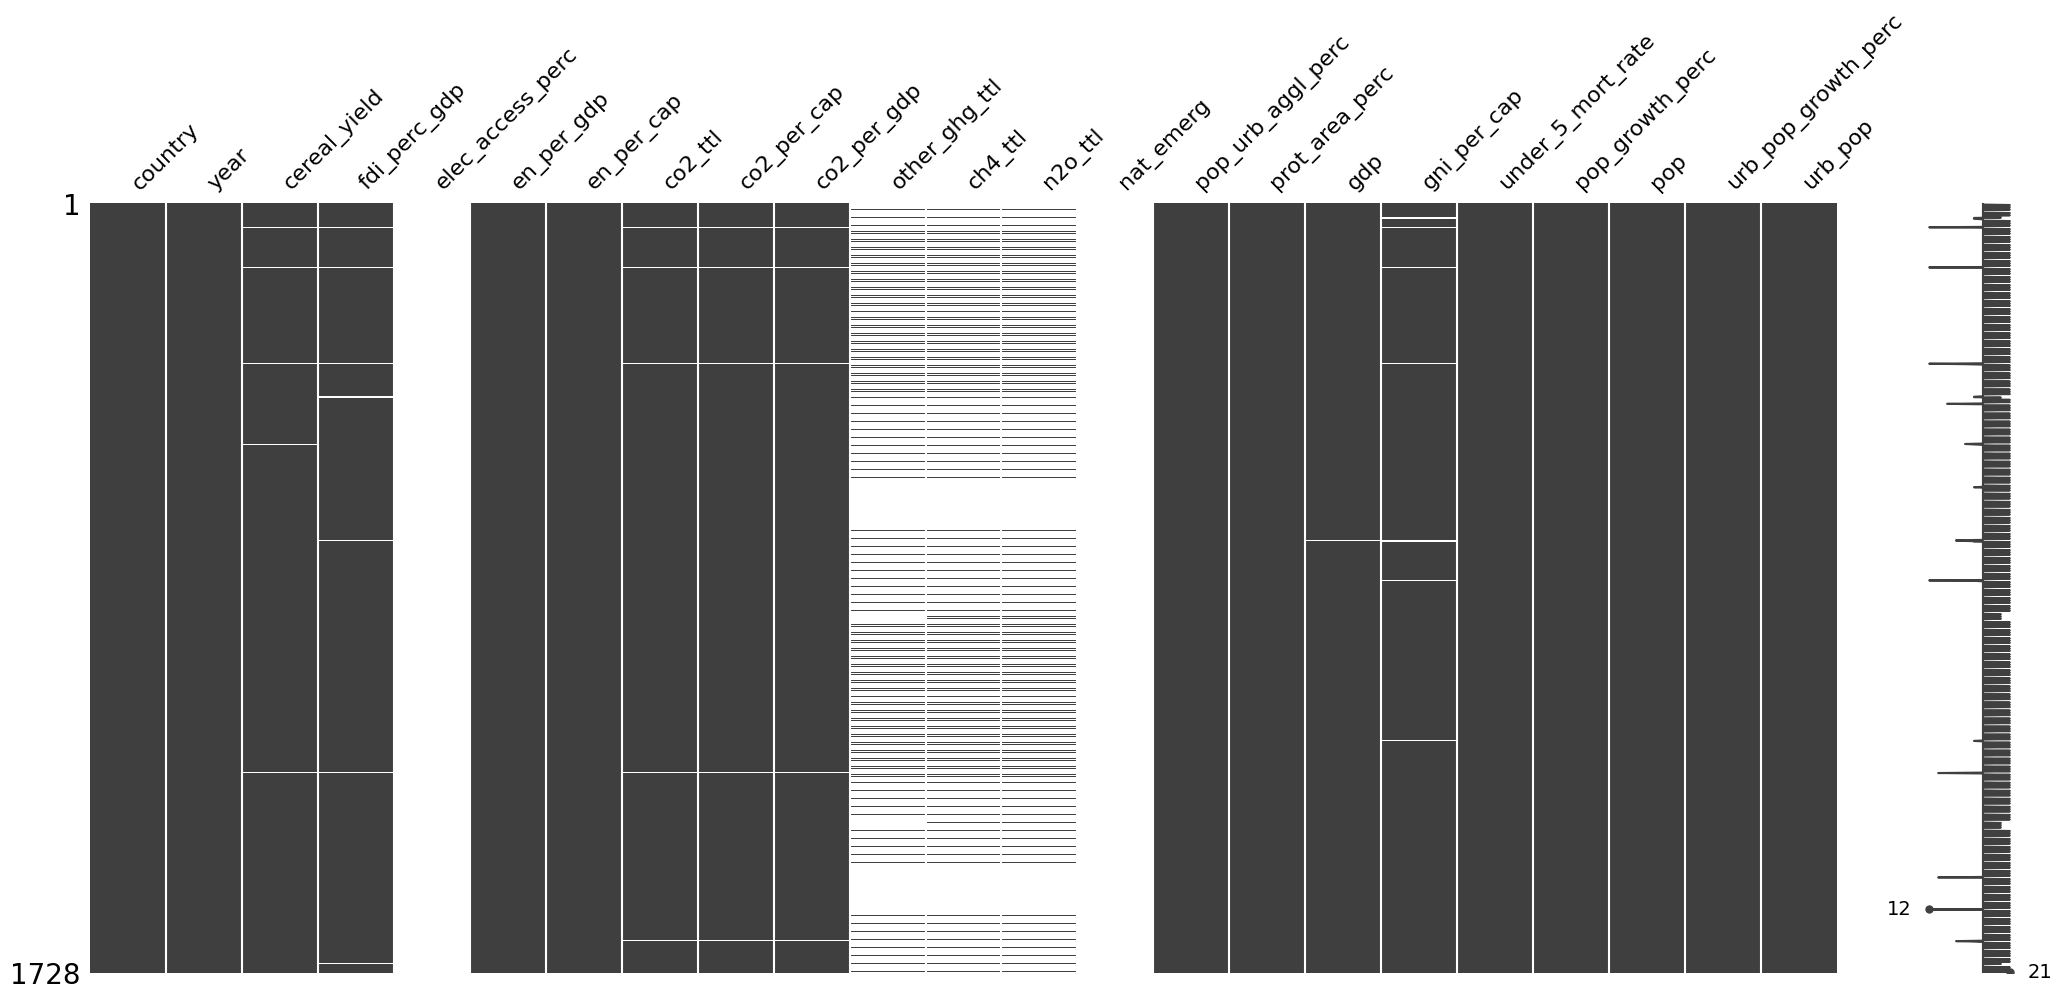

In [33]:
import missingno as msno
msno.matrix(all_vars_clean)
print(all_vars_clean.shape)

(1700, 18)


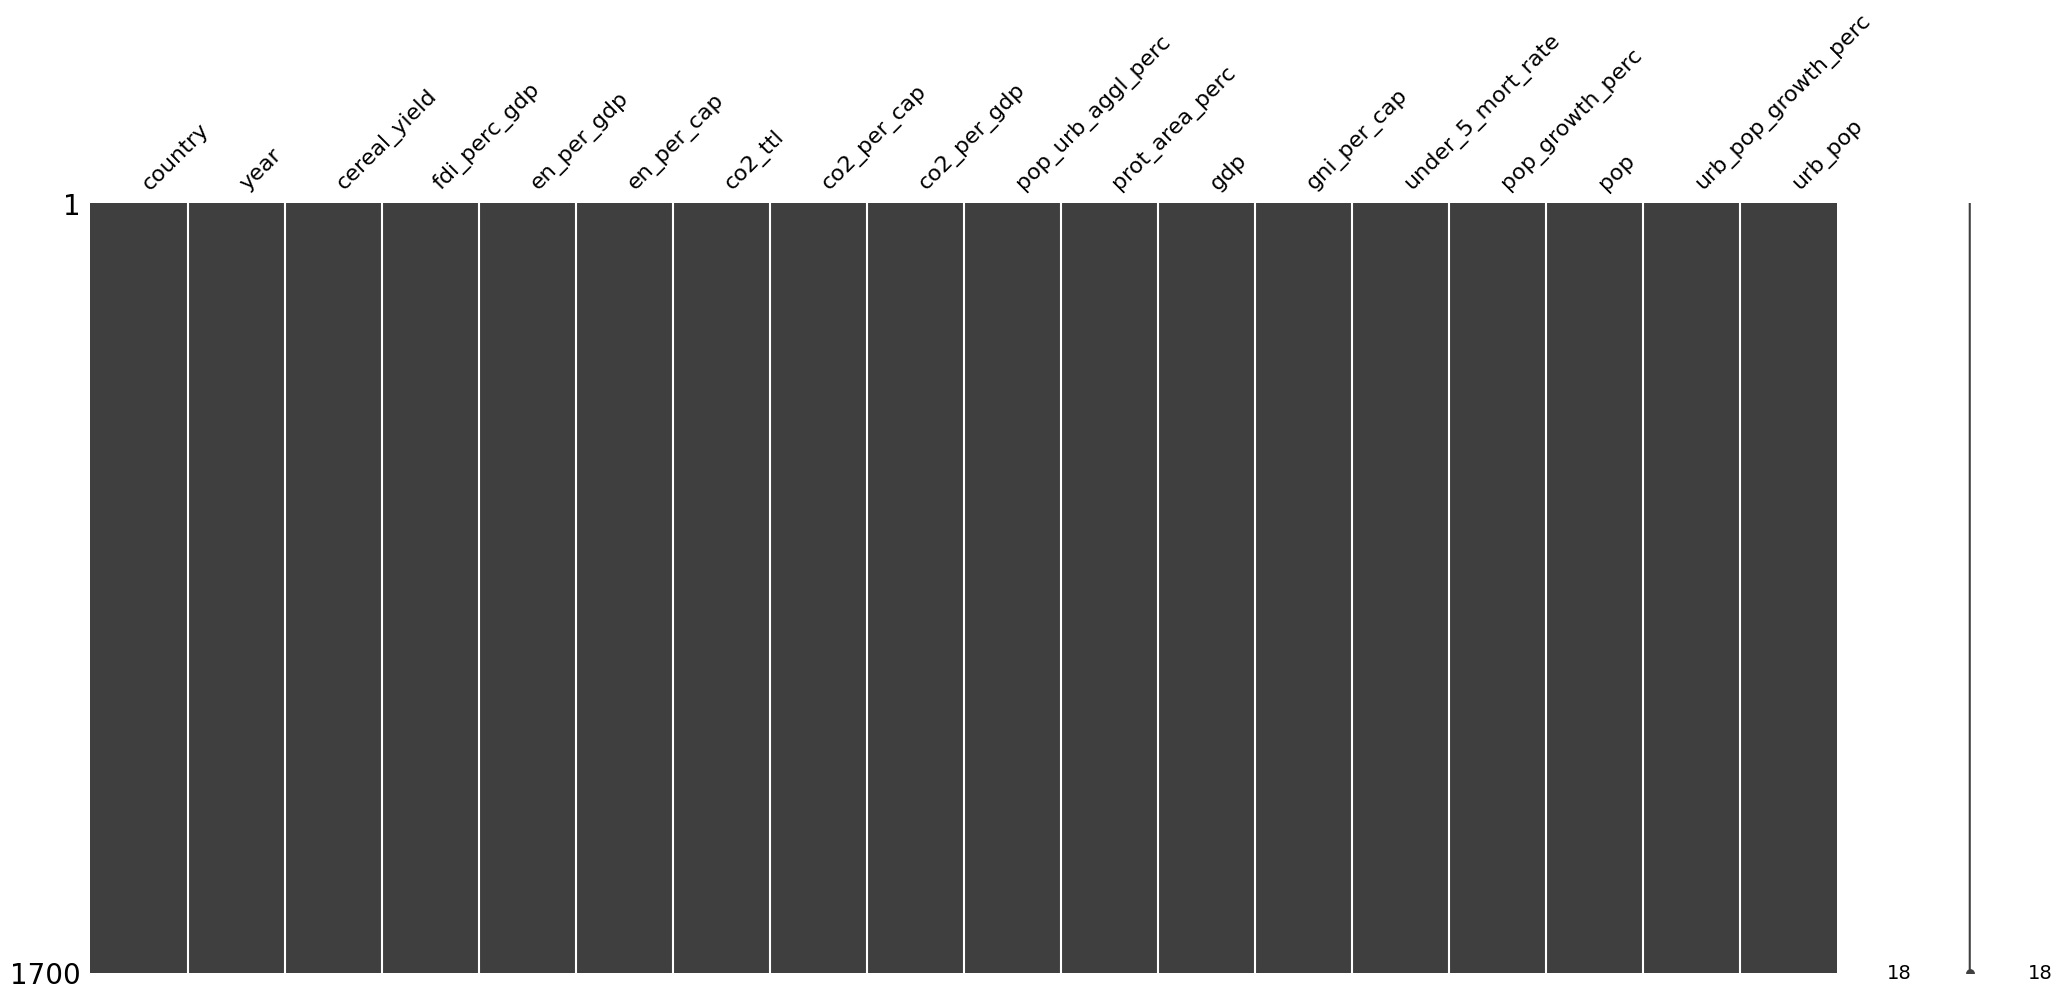

In [34]:
import missingno as msno
msno.matrix(all_vars_clean3)
print(all_vars_clean3.shape)
